In [1]:
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.ndimage import convolve

In [2]:
def generate_field(N_dim=100, percent_of_free_points=0.01):
    dim = N_dim**2 * (1 - percent_of_free_points)
    ones = np.ones(int(dim // 2 + dim % 2), dtype=np.uint8) * 255
    zeroe = np.zeros(int(dim // 2), dtype=np.uint8)
    empty = np.ones(int(N_dim**2 * percent_of_free_points), dtype=np.uint8) * 120
    field = np.hstack([ones, zeroe, empty])
    field = np.random.permutation(field).reshape(N_dim, N_dim)
    field = field.reshape(N_dim, N_dim)
    return field

In [3]:
def move(field, threshold):
    kernel = np.ones((3, 3))
    kernel[1, 1] = 0

    count_ones = convolve((field == 255).astype(int), kernel, mode="constant")
    count_zeroes = convolve((field == 0).astype(int), kernel, mode="constant")
    is_free = field == 120

    R = 8 * threshold
    is_ones_ready = (count_ones < R) & (field == 255)
    is_zeroes_ready = (count_zeroes < R) & (field == 0)

    is_ready_to_move = is_zeroes_ready | is_ones_ready
    is_moving = is_ready_to_move | is_free

    field[is_moving] = np.random.permutation(field[is_moving])
    return field, is_ready_to_move

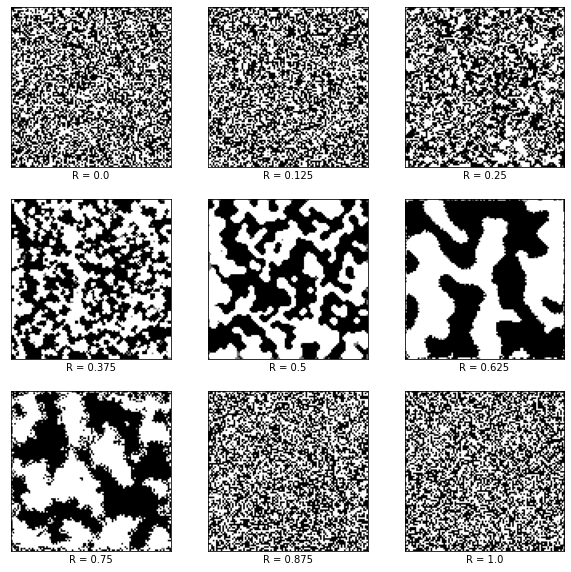

In [4]:
Rs = np.arange(0, 1 + 1 / 8, 1 / 8)
N = int(np.round(Rs.shape[0] ** (1 / 2)))
fig, ax = plt.subplots(N, N, figsize=(10, 10))

max_iter = 50
iter_step = 2

fileds_list = []
for R in Rs:
    field = generate_field()
    fields = [field]
    for i in range(max_iter):
        field, _ = move(field, R)
        if i % iter_step == 0:
            fields.append(field.copy())
    fileds_list.append(fields)


def AnimationFunction(frame):
    for n in range(Rs.shape[0]):
        i = n // N
        j = n % N
        ax[i, j].imshow(fileds_list[n][frame], cmap="gray")
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].set_xlabel(f"R = {Rs[n]}")


anim_created = FuncAnimation(
    fig, AnimationFunction, frames=max_iter // iter_step, interval=1
)
anim_created.save(f"HW1task3.gif", dpi=150, writer=PillowWriter(fps=1))

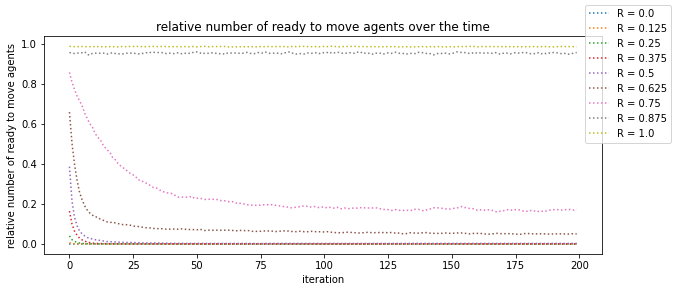

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
for R in Rs:
    field = generate_field()
    ready_to_move_hist = []
    for i in range(200):
        field, is_ready_to_move = move(field, R)
        ready_to_move_hist.append(is_ready_to_move.sum() / field.shape[0] ** 2)
    ax.plot(ready_to_move_hist, label=f"R = {R}", linestyle="dotted")
fig.legend()
ax.set_title("relative number of ready to move agents over the time")
ax.set_ylabel("relative number of ready to move agents")
ax.set_xlabel("iteration")
plt.show()